# Exploratory analysis of the data

## Import libraries

In [1]:
# Libraries
import numpy as np
import pandas as pd
#Importing Visualization Library Seaborn and Matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import plotly.express as px
#Importing intertools packages
from itertools import combinations
from itertools import product
# Improting Scipy
import scipy.stats as ss

## Load the dataset

In [4]:
# Load the dataset
working_df = pd.read_csv('life_expectancy_final.csv')
working_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,2928.0,1.463500e+03,8.453851e+02,0.000000e+00,7.317500e+02,1.463500e+03,2.195250e+03,2.927000e+03
Year,2928.0,2.007500e+03,4.610560e+00,2.000000e+03,2.003750e+03,2.007500e+03,2.011250e+03,2.015000e+03
life_expectancy,2928.0,6.922493e+01,9.523867e+00,3.630000e+01,6.310000e+01,7.210000e+01,7.570000e+01,8.900000e+01
adult_mortality,2928.0,1.647964e+02,1.242921e+02,1.000000e+00,7.400000e+01,1.440000e+02,2.280000e+02,7.230000e+02
infant_deaths,2928.0,3.040745e+01,1.181144e+02,0.000000e+00,0.000000e+00,3.000000e+00,2.200000e+01,1.800000e+03
Alcohol,2735.0,4.614856e+00,4.050749e+00,1.000000e-02,9.050000e-01,3.770000e+00,7.715000e+00,1.787000e+01
perc_expend,2928.0,7.403212e+02,1.990931e+03,0.000000e+00,4.853964e+00,6.561145e+01,4.426143e+02,1.947991e+04
hepa_b,2375.0,8.096084e+01,2.501834e+01,1.000000e+00,7.700000e+01,9.200000e+01,9.700000e+01,9.900000e+01
Measles,2928.0,2.427856e+03,1.148597e+04,0.000000e+00,0.000000e+00,1.700000e+01,3.622500e+02,2.121830e+05
BMI,2896.0,3.823539e+01,1.995959e+01,1.000000e+00,1.930000e+01,4.335000e+01,5.610000e+01,7.760000e+01


In [8]:
# change year and country to category
working_df['Country'] = working_df['Country'].astype('category')
working_df['Year'] = working_df['Year'].astype('category')

## Create custom functions

In [11]:
#Create a function to check unique values in different variables
def check_unique(table):
    unique_values = {}
    for col in table.columns:
        unique_values[col] = table[col].value_counts().shape[0]
    return pd.DataFrame(unique_values, index=['unique value count']).T

# Functions for distribution analysis
# Create a function to create a count plot
def create_countplot(data, x, ax, title):
    sns.countplot(data=data, x=x, color='lightblue', ax=ax)
    ax.set_title(title)
    ax.set_xlabel(x)
    return ax
# Create a function to create a hist plot
def create_histplot(data, x, ax, title):
    sns.histplot(data=data, x=x, color='lightblue', ax=ax, binwidth=1)
    ax.set_title(title)
    ax.set_xlabel(x)
    return ax
# Create a function that graphs multiple variables at once
def univariate_plotter(x_vars,data=working_df):
    if not isinstance(x_vars, list):
        x_vars = [x_vars]
    nrows = len(x_vars)
    if nrows == 1:
        fig,ax = plt.subplots(nrows=1, figsize=[16,4])
        axes = [ax]
    else:
        fig,axes=plt.subplots(nrows=nrows, figsize=[16,4*nrows])
    for i,x in enumerate(x_vars):
        title = f'Distribution by {x}'
        if data[x].dtype=='category':
            axes[i] = create_countplot(data, x, axes[i], title)
        else:
            axes[i] = create_histplot(data, x, axes[i], title)
    plt.tight_layout()
    plt.show()

# Functions for cross-correlation analysis
# Create a function to create a graph of two variable
def create_bvplot_gs(data, x, y, ax, charttype):
    '''
    This function creates a graph for two columns in a dataframe. The graph would depend on the indicated charttype with ax as the subplot of the graph'''
    # Check the chart type and graph the two variable depending on it.
    if charttype=='scatter':
        sns.scatterplot(data=data, x=x, y=y, palette='Blues', ax=ax)
    elif charttype=='barh':
        ax = data.groupby([x])[y].value_counts(normalize=True).mul(100).unstack(level=-1).plot.barh(stacked=True,ax=ax)
    elif charttype=='boxplot':
        sns.boxplot(data=data, x=x, y=y, palette='Blues', ax=ax)
    return ax
# Create a function that will visualize the relationship between two lists of variable
def bivariate_eda(vars1, vars2, data):
    """
    This function creates a grid of plots to show the relationship between two variables in the input data.
    It takes in either two columns, a column and a list of columns, or two lists of columns as input and plots the relationship between each combination of variables. 
    The type of graph produced depends on the data type of the input variables. 
    Categorical x and y: 100% stacked bar graph
    Categorical x or y: Boxplot
    Numerical x and y: Scatterplot

    Parameters:
    vars1 (list or str): First variable or list of variables
    vars2 (list or str): Second variable or list of variables
    data (pandas dataframe): Input data

    Returns:
    None
    """
    # Check if the inputs are lists. If not, make them a list
    vars1 = [vars1] if not isinstance(vars1,list) else vars1
    vars2 = [vars2] if not isinstance(vars2,list) else vars2
    nrows=len(vars1)
    ncols=len(vars2)
    # Creates subplots using matplotlib.pyplot.subplots function. If there is only one plot, it creates a single plot with figsize set to [16, 4], otherwise, it creates a matrix of plots with figsize set to [30, 30].
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=[30,30]) if nrows*ncols > 1 else plt.subplots(nrows=1, figsize=[16,4])
    axes = [axes] if nrows*ncols == 1 else axes
    # Create a graph for each subplots created for every combination of x and y. The graph would depend on the type of variable x and y are. If both are categorical, it would create a 100% stacked bar graph, if one is categorical and the other is numerical then boxplot and if both are numerical then it would create a scatterplot.
    for x in range(nrows):
        for y in range(ncols):
            # Skip the loop if the variable x and y are the same
            if vars1[x]==vars2[y]:
                continue
            # Get the charttype depending on the type of variable for x and y.
            if (data[vars1[x]].dtype=='category') and (data[vars2[y]].dtype=='category'):
                charttype='barh'
            elif (data[vars1[x]].dtype=='category') or (data[vars2[y]].dtype=='category'):
                charttype='boxplot'
            else:
                charttype='scatter'
            # Plot a matrix of graph with each axis showing all the combination of a variable
            if nrows>1 and ncols>1:
                axes[x,y] = create_bvplot_gs(data, vars1[x], vars2[y], axes[x,y], charttype)
            elif nrows>1:
                axes[x] = create_bvplot_gs(data, vars1[x], vars2[y], axes[x], charttype)
            elif ncols>1:
                axes[y] = create_bvplot_gs(data, vars1[x], vars2[y], axes[y], charttype)
            else:
                axes[0] = create_bvplot_gs(data, vars1[x], vars2[y], axes[0], charttype)
    # Add labels to the x and y axes, and adjusts the layout using plt.tight_layout().             
    for x in range(nrows):
        if nrows>1 and ncols>1:
            axes[x,0].set_ylabel(vars1[x])
        elif nrows>1:
            axes[x].set_ylabel(vars1[x])
        else:
            axes[0].set_ylabel(vars1[x])
    for y in range(ncols):
        if nrows>1 and ncols>1:
            axes[0,y].set_title(vars2[y])
            axes[-1,y].set_xlabel(vars2[y])
        elif ncols>1:
            axes[y].set_title(vars2[y])           
        else:
            axes[0].set_title(vars2[y])
            axes[-1].set_xlabel(vars2[y])
    plt.tight_layout()
    plt.show()

## Check unique values of the table

In [12]:
check_unique(working_df)

,unique value count
Unnamed: 0,2928
Country,183
Year,16
Status,2
life_expectancy,362
adult_mortality,425
infant_deaths,209
Alcohol,1076
perc_expend,2323
hepa_b,87


## Univariate analysis

In [19]:
vars = ['Country','Year','Status','life_expectancy','adult_mortality','infant_deaths','Alcohol','perc_expend','hepa_b','Measles ',
        'BMI','underfive_deaths','Polio','total_expenditure','diphtheria','hiv','thinness_10_19','thinness_5_9','income_comp','Schooling',
        'population_wb','gdb_wb']

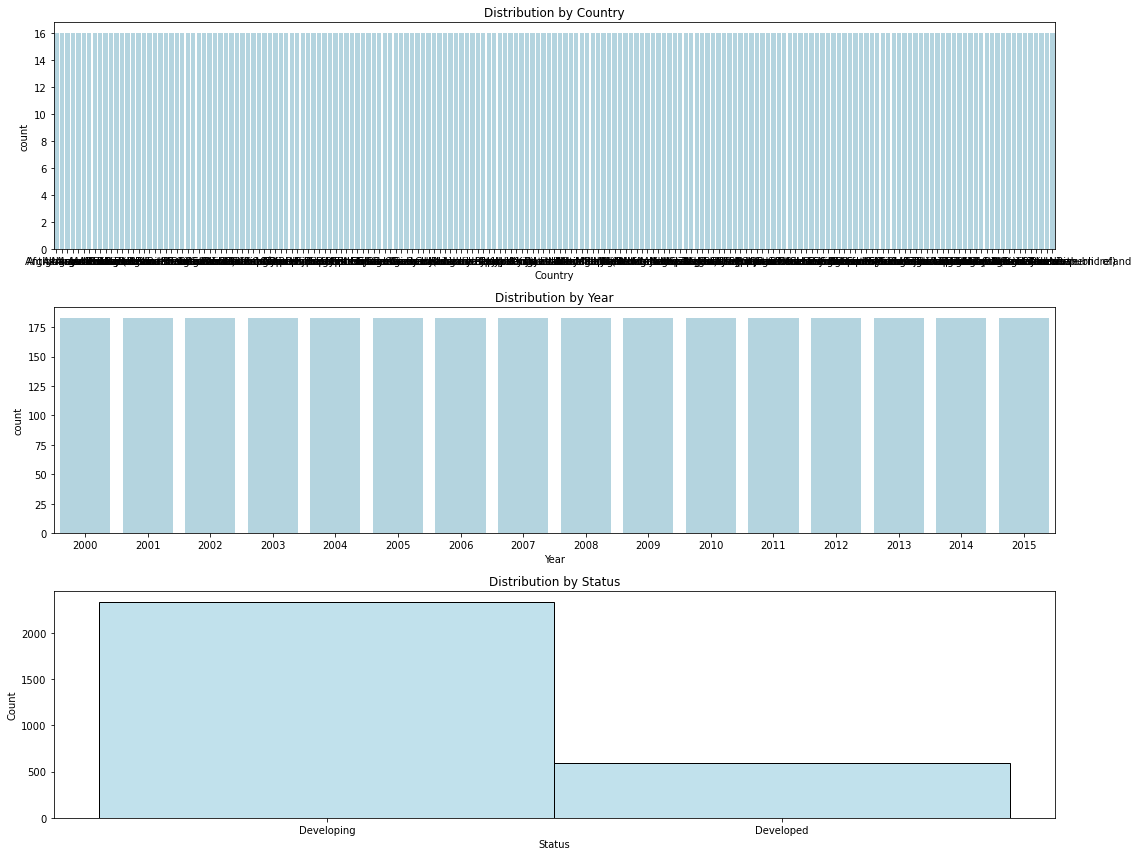

In [21]:
univariate_plotter(['Country','Year','Status'],data=working_df)

Index(['Unnamed: 0', 'Country', 'Year', 'Status', 'life_expectancy',
       'adult_mortality', 'infant_deaths', 'Alcohol', 'perc_expend', 'hepa_b',
       'Measles ', 'BMI', 'underfive_deaths', 'Polio', 'total_expenditure',
       'diphtheria', 'hiv', 'thinness_10_19', 'thinness_5_9', 'income_comp',
       'Schooling', 'population_wb', 'gdb_wb'],
      dtype='object')